In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier   # Classification
from sklearn.tree import DecisionTreeRegressor    # Regression 
from sklearn.datasets import load_diabetes

Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose',
                'BloodPressure','DiabetesPedigreeFunction']
X = df[feature_cols] 
y = df['Outcome']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
model = DecisionTreeClassifier(max_depth=3, max_features=7)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=7)

In [6]:
y_pred = model.predict(X_test)
y_pred1 = model.predict(X_train)

In [7]:
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred1))
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))

Accuracy Train: 0.7635009310986964
Accuracy Test: 0.7575757575757576


## Visualize DTs
- Install Libs:  

    sudo apt install graphviz  
    pip install graphviz  
    pip install pydotplus  


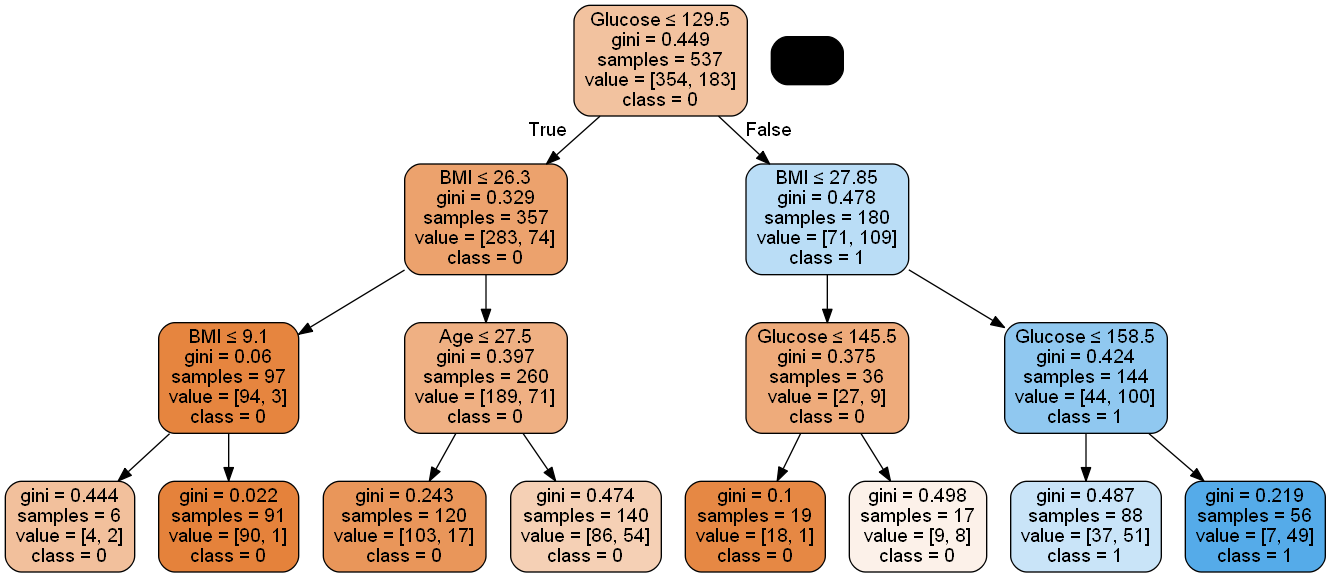

In [8]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO # For old versions
from io import StringIO 
from IPython.display import Image            # to display on screen
import pydotplus                             # Convert Graph to Pic  

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Raster!
# JPG -> Losely
# PNG -> Loseless
# Vector!
# SVG

# graph.write_png('tree.png')
graph.write_svg('tree.svg')
Image(graph.create_png())

In [9]:
model.feature_importances_

array([0.        , 0.        , 0.27555314, 0.10180908, 0.62263778,
       0.        , 0.        ])